In [1]:
import random as rand
from math import sqrt
import numpy as np
import pandas as pd

In [2]:
nusers = 100
nitems = 100
k = 10

pu = np.random.rand(k,1)

Q = np.random.rand(nitems,k)
nQ = np.dot(Q,Q.T)

ru = np.dot(Q,pu)
D = (np.diag(nQ) + np.diag(nQ.T) - 2*nQ)
nitems = len(ru)
ntrans=200
state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
action = np.ceil(np.random.rand(ntrans,1)*nitems).astype(int)
next_state = np.ceil(np.random.rand(ntrans,2)*nitems).astype(int)
for i in range(0, len(state)):
    next_state[i][0]=state[i][1]
    next_state[i][1]=action[i][0]


In [3]:
dataset = pd.DataFrame({'state': list(state), 'action': list(action), 'next_state': list(next_state)}, columns=['state', 'action', 'next_state'])

In [4]:
dataset

,state,action,next_state
0,"[89, 72]",[4],"[72, 4]"
1,"[9, 68]",[40],"[68, 40]"
2,"[70, 15]",[59],"[15, 59]"
3,"[81, 87]",[73],"[87, 73]"
4,"[52, 46]",[14],"[46, 14]"
...,...,...,...
195,"[13, 66]",[71],"[66, 71]"
196,"[94, 62]",[78],"[62, 78]"
197,"[19, 73]",[22],"[73, 22]"
198,"[33, 44]",[61],"[44, 61]"


In [5]:
def getReward1(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0]
        for i in range(0, len(state)):
            if state[i]==-1:
                reward +=0
                break
            else:
                reward += (1/((len(state)-i)+1)) * dist[(state[i])*nitems + action] 
    except IndexError:
        reward = 1.5
    return reward

In [6]:
def getReward(ru, D, state, action):
    nitems = len(ru)
    dist = D.flatten()
    try:
        reward = ru[action][0] +  dist[(state[0])*nitems + action] + dist[(state[1])*nitems + action]
    except IndexError:
        reward = 1.5
    return reward

In [7]:
reward=[]
for i in range(0,len(state)):
    reward.append(getReward(ru, D, state[i],action[i]))

#reward = ru[action[0]][0] + DD[(state[1])*nitems + action[0]]
    

In [8]:
dataset["reward"]=reward

In [9]:
dataset

,state,action,next_state,reward
0,"[89, 72]",[4],"[72, 4]",[5.9900740027711485]
1,"[9, 68]",[40],"[68, 40]",[2.2407091327534037]
2,"[70, 15]",[59],"[15, 59]",[11.40622982986762]
3,"[81, 87]",[73],"[87, 73]",[4.87571392629298]
4,"[52, 46]",[14],"[46, 14]",[12.057825084683477]
...,...,...,...,...
195,"[13, 66]",[71],"[66, 71]",[14.103446403650032]
196,"[94, 62]",[78],"[62, 78]",[6.616726945938289]
197,"[19, 73]",[22],"[73, 22]",[5.641604978201948]
198,"[33, 44]",[61],"[44, 61]",[7.4654344097996095]


In [10]:
from gym import Env
from gym.spaces import Discrete, Box
from numpy import int64

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from gym.spaces import Box, Discrete
from tqdm import tqdm

  
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

2023-01-26 11:31:11.925884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 11:31:12.084918: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-26 11:31:12.084962: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-26 11:31:13.133867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.

In [11]:
a=Box(low=0, high=99, shape=(1,2), dtype=int64)
k=a.sample()
print(k.shape)


(1, 2)


In [12]:
observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
a=observation_space.sample().ravel()
print(a)
action=89
a=np.append(a, action)
a[2]
if action in a:
    print("Asr")
else:
    print("as")

[88 67]
Asr


In [13]:
class CustomEnv1(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,10), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        
    def step(self,action):
        self.i+=1
        for j in range(self.i,10):
            self.state[j]=-1
        self.next_state = self.observation_space.sample().ravel()
        #self.next_state[0] = self.state[1]
        #self.next_state[1]= action
        
        if action in self.state:
            self.state[self.i]=action
            reward = -100
        else:  
            self.state[self.i]=action  
            reward= getReward1(ru, D, self.state, action)
        
        if self.i==9:
            print(self.state)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [14]:
class CustomEnv(Env):
    def __init__(self):
        self.i=0
        self.action_space = Discrete(100)
        self.observation_space = Box(low=0, high=99, shape=(1,2), dtype=int64)
        self.state = self.observation_space.sample().ravel()
        self.a=self.state
        
    def step(self,action):
        self.i+=1
        self.next_state = self.observation_space.sample().ravel()
        self.next_state[0] = self.state[1]
        self.next_state[1]= action
        #print(self.next_state)
        if action in self.a:
            reward=-100
        else:
            reward= getReward(ru, D, self.state, action)
        self.state=self.next_state
        self.a=np.append(self.a,action)
        if self.i==12:
            print(self.a)
            done=True
        else:
            done=False
        info={}

        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.a=[]
        self.i=0
        self.state = self.observation_space.sample().ravel()
        return self.state

In [15]:
env = CustomEnv1()

In [16]:
a=env.observation_space.sample().ravel()

print(a)
a[0]

[ 9 53 21 66 23 89 19 35 78 90]


9

In [17]:
episodes = 10 #20 shower episodes
for episode in tqdm(range(1, episodes+1)):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

100%|██████████| 10/10 [00:00<00:00, 671.10it/s]

[33 45 17 20 22 50 75 41 21 53]
Episode:1 Score:38.322226258015874
[93 77 77 51 37 79 83 73 89 16]
Episode:2 Score:-70.85495226939237
[16  0 37 16 57  8 31  0 10 82]
Episode:3 Score:-171.63912683481706
[70 99 99  8 85 27 67  3 36 98]
Episode:4 Score:-65.0524705968318
[14 66 83 46 12 45 74 26 55 49]
Episode:5 Score:40.994677449591684
[22 62 72 20 71 61  7 26 54 42]
Episode:6 Score:34.448990039346135
[91 62 93 38 77 46 23 70 85 37]
Episode:7 Score:34.709822543183286
[21 72 90 87 24 59 81 13 42 68]
Episode:8 Score:32.975160063260084
[31  2 48 82 41 45 17 54 49 53]
Episode:9 Score:42.52865793240852
[97 10 33 12 57 51 49 63 31 25]
Episode:10 Score:36.30542795623659


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.optimizers import Adam

In [19]:
states = np.shape(env.observation_space)
actions = env.action_space.n

In [20]:
states

(1, 10)

In [21]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [22]:
model = build_model(states, actions)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 24)             264       
                                                                 
 dense_1 (Dense)             (None, 1, 24)             600       
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               2500      
                                                                 
Total params: 3,364
Trainable params: 3,364
Non-trainable params: 0
_________________________________________________________________


In [24]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2, gamma=0.1)
    return dqn

In [25]:

#Adam._name = 'hey'

In [26]:

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
history=dqn.fit(env, nb_steps=20000, visualize=False, verbose=1)

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-01-26 11:31:17.185568: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-26 11:31:17.185687: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-26 11:31:17.185775: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could n

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training for 80000 steps ...
Interval 1 (0 steps performed)


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-01-26 11:31:17.847086: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_2/BiasAdd' id:115 op device:{requested: '', assigned: ''} def:{{{node dense_2/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_2/MatMul, dense_2/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-01-26 11:31:17.871896: W tensorflow/c/c_api.cc:291] Operation '{name:'total_2/Assign' id:378 op device:{requested: '', assigned: ''} def:{{{node total_2/Assign}} = AssignVariableOp[_has_manual_co

    1/10000 [..............................] - ETA: 16:37 - reward: 2.5286[25 13  8 61 13 13 13 84 44 13]


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
2023-01-26 11:31:17.962263: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_2_1/BiasAdd' id:229 op device:{requested: '', assigned: ''} def:{{{node dense_2_1/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_2_1/MatMul, dense_2_1/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error

   33/10000 [..............................] - ETA: 4:19 - reward: -27.3515[ 3 50 38 35 12 38 17 38 95 19]


/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/rl/memo

 1584/10000 [===>..........................] - ETA: 1:05 - reward: -23.3195

In [ ]:
print(model.output_shape)
print(actions)
results = dqn.test(env, nb_episodes=150, visualize=False)
print(np.mean(results.history['episode_reward'])) 


(None, 100)
100
Testing for 150 episodes ...
[ 9  4 50 23 43 55 59 40 40  6]
Episode 1: reward: 21.078, steps: 9
[70 76 76 17  4  4  4 40  4  4]
Episode 2: reward: -81.481, steps: 9
[67  6 96 23 43 23 23 23 23 23]
Episode 3: reward: -82.534, steps: 9
[86 40 50 17 17 17 40 40  4  6]
Episode 4: reward: -57.197, steps: 9
[ 6  4 50 23 43 55 59 40 40  6]
Episode 5: reward: -7.535, steps: 9
[44 76 10 10 10 10 29 29 87 76]
Episode 6: reward: -79.069, steps: 9
[78 76 76 17 17  4  6 40  4  4]
Episode 7: reward: -55.488, steps: 9
[ 0 32 53  4  4  4  4  4  4  4]
Episode 8: reward: -110.128, steps: 9
[78 85 76 17 87 87 40 40 40 40]
Episode 9: reward: -55.132, steps: 9
[47 85 10 10 10 10 29 29 87 76]
Episode 10: reward: -52.273, steps: 9
[33 40 76  4  4  4  4  6  4  4]
Episode 11: reward: -80.872, steps: 9
[71 40 76  4 43  6  6  6  6  6]
Episode 12: reward: -56.080, steps: 9
[81 36 50 17 17 17 40 36  4  4]
Episode 13: reward: -58.442, steps: 9
[ 0 76 53  4  4  4  4  4  4  4]
Episode 14: reward: -10

Testing for 10 episodes ...
[13  4]
1.7727791061964266
4
[4 4]
-8.0
4
[4 7]
13.292357103697995
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[4. 4. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[7 7]
-8.0
7
Episode 1: reward: -64.935, steps: 12
[98  7]
11.969784278626616
7
[7 4]
2.8492859440907683
4
[4 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7. 4. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[7 7]
-8.0
7
Episode 2: reward: -65.181, steps: 12
[37  7]
9.336104503714024
7
[7 4]
1.714556957900037
4
[4 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7. 4. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[7 7]
-8.0
7
Episode 3: reward: -68.949, steps: 12
[54  7]
12.019430461006955
7
[7 4]
2.7580005958001497
4
[4 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7 7]
-8.0
7
[7. 4. 7. 7. 7.

Text(0, 0.5, 'reward')

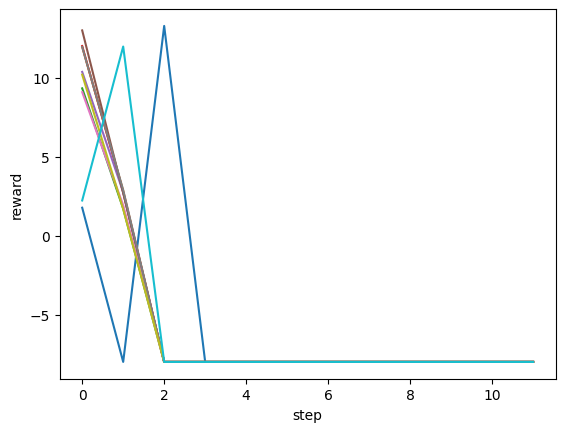

In [ ]:
import rl.callbacks
class EpisodeLogger(rl.callbacks.Callback):
    def __init__(self):
        self.observations = {}
        self.rewards = {}
        self.actions = {}

    def on_episode_begin(self, episode, logs):
        self.observations[episode] = []
        self.rewards[episode] = []
        self.actions[episode] = []
        
    def on_step_end(self, step, logs):
        episode = logs['episode']
        self.observations[episode].append(logs['observation'])
        print(logs['observation'])
        print(logs['reward'])
        print(logs['action'])
        self.rewards[episode].append(logs['reward'])
        self.actions[episode].append(logs['action'])

cb_ep = EpisodeLogger()
dqn.test(env, nb_episodes=10, visualize=False, callbacks=[cb_ep])


%matplotlib inline
import matplotlib.pyplot as plt

for obs in cb_ep.rewards.values():
    plt.plot([o for o in obs])
plt.xlabel("step")
plt.ylabel("reward")

In [ ]:
rewards=[]
for obs in cb_ep.rewards.values():
    rewards.append(obs)

In [ ]:
cum_reward=[]
for i in rewards:
    p=0
    u=[]
    for j in i:
        j*=-1
        p+=j
        u.append(p)
    cum_reward.append(u)

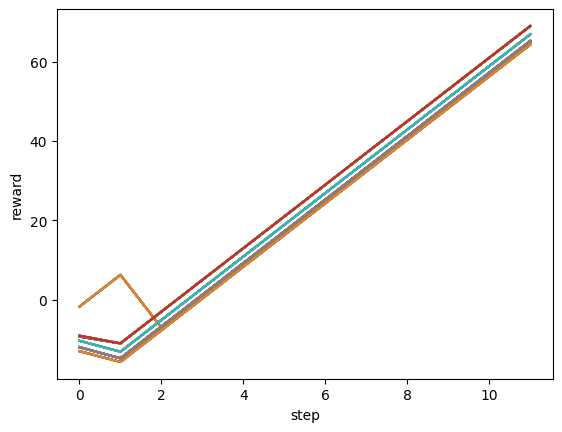

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
x=list(range(12))
for i in range(7):
    purchases = cum_reward[i]
    for j in range(len(purchases)):
        plt.plot(x,purchases)
        plt.xlabel("step")
        plt.ylabel("reward")